In [ ]:
### Yiğit Şevki KAPLAN
### 22243810049
### 01.10.2025

In [ ]:
import pandas as pd

In [ ]:
exp = pd.read_csv('Salary_Data.csv')

In [ ]:
exp.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
exp.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
exp.shape

(30, 2)

In [ ]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
print(exp.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [ ]:
import seaborn as sns

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


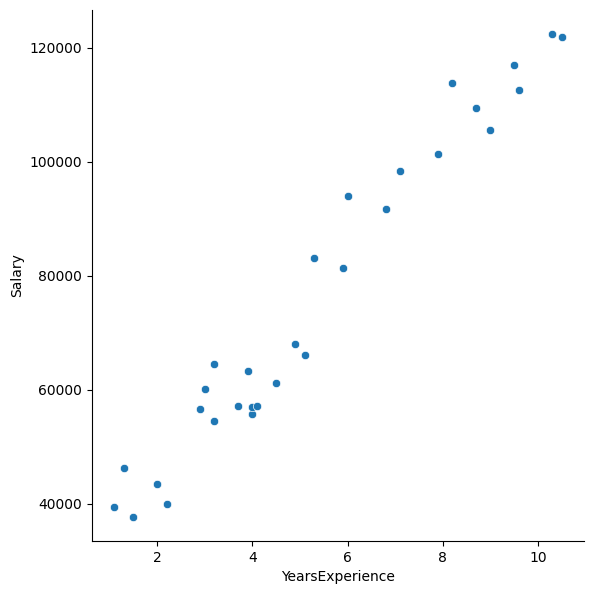

In [ ]:
sns.pairplot(exp, x_vars = ['YearsExperience'], y_vars = ['Salary'], size = 6)

<Axes: >

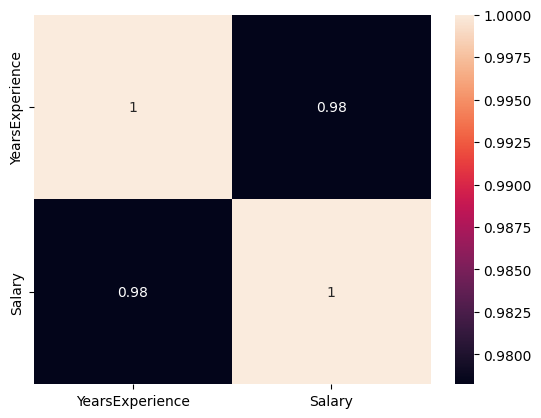

In [ ]:
sns.heatmap(exp.corr(), annot = True)

In [ ]:
X = exp['YearsExperience']
Y = exp['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 149)

In [ ]:
len(x_train)

24

In [ ]:
len(x_test)

6

In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_sm = sm.add_constant(x_train)

In [ ]:
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     485.0
Date:                Thu, 02 Oct 2025   Prob (F-statistic):           1.76e-16
Time:                        10:26:45   Log-Likelihood:                -241.87
No. Observations:                  24   AIC:                             487.7
Df Residuals:                      22   BIC:                             490.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.653e+04   2519.047     

In [1]:
# Even with 0 years of experience, the expected salary is around 26,530
# For each additional year of experience, salary increases on average by 9,459 units
# Reject H0, both Coef. intervals doesn't include 0
# The F-test checks if the overall model is statistically significant,
#                               since 1.76e-16 < 0.05 its significant
# R-squared is really close to 1 so it's a very strong fit

# Assumptions
# Independence of Errors: Durbin-Watson close to 2 so residuals are uncorrelated
# Normality of Errors:    Prob(JB) & Prob(Omnibus) > 0.05 so fail to reject H0,
#                                             residuals are normally distributed